**Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

**Load the iris dataset**

In [ ]:
file = pd.read_csv('Iris.csv')
file

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
file.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
file.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
file.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
file.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
file.shape

(150, 6)

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
file.drop(columns=['Id'], inplace=True)

In [ ]:
species_mapping = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
file['SpeciesN'] = file['Species'].map(species_mapping)
file

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesN
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3


#**Training Naïve Bayes Classifier for classification**

**Splitting dataset into training and testing sets**

In [ ]:
X = file.drop(['Species','SpeciesN'], axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = file['SpeciesN']
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: SpeciesN, Length: 150, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
print("Training Dataset(Independent variable)\n")
print(X_train)
print()
print("Testing Dataset(Independent variable)\n")
print(X_test)
print()

Training Dataset(Independent variable)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22             4.6           3.6            1.0           0.2
15             5.7           4.4            1.5           0.4
65             6.7           3.1            4.4           1.4
11             4.8           3.4            1.6           0.2
42             4.4           3.2            1.3           0.2
..             ...           ...            ...           ...
71             6.1           2.8            4.0           1.3
106            4.9           2.5            4.5           1.7
14             5.8           4.0            1.2           0.2
92             5.8           2.6            4.0           1.2
102            7.1           3.0            5.9           2.1

[120 rows x 4 columns]

Testing Dataset(Independent variable)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73             6.1           2.8            4.7           1.2
18             5.7          

In [ ]:
print("Training Dataset(Dependent variable)\n")
print(y_train)
print()
print("Testing Dataset(Dependent variable)\n")
print(y_test)

Training Dataset(Dependent variable)

22     1
15     1
65     2
11     1
42     1
      ..
71     2
106    3
14     1
92     2
102    3
Name: SpeciesN, Length: 120, dtype: int64

Testing Dataset(Dependent variable)

73     2
18     1
118    3
78     2
76     2
31     1
64     2
141    3
68     2
82     2
110    3
12     1
36     1
9      1
19     1
56     2
104    3
69     2
55     2
132    3
29     1
127    3
26     1
128    3
131    3
145    3
108    3
143    3
45     1
30     1
Name: SpeciesN, dtype: int64


**Initialize the Naïve Bayes classifier**

In [ ]:
classifier = GaussianNB()

In [ ]:
classifier.fit(X_train, y_train)

GaussianNB()

**Making predictions based on X-test**

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1])

**Printing the predicted and actual output**

In [ ]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
           'Species(Predicted)']
cust_headers = ['SL', 'SW', 'PL', 'PW', 'Predicted']
X_test_df = pd.DataFrame(X_test, columns=columns[:-1])

table_data = np.column_stack((X_test_df[:10].values, y_pred[:10]))
headers = columns
table = tabulate(table_data, headers=cust_headers, tablefmt="fancy_grid")
print(table)

╒══════╤══════╤══════╤══════╤═════════════╕
│   SL │   SW │   PL │   PW │   Predicted │
╞══════╪══════╪══════╪══════╪═════════════╡
│  6.1 │  2.8 │  4.7 │  1.2 │           2 │
├──────┼──────┼──────┼──────┼─────────────┤
│  5.7 │  3.8 │  1.7 │  0.3 │           1 │
├──────┼──────┼──────┼──────┼─────────────┤
│  7.7 │  2.6 │  6.9 │  2.3 │           3 │
├──────┼──────┼──────┼──────┼─────────────┤
│  6   │  2.9 │  4.5 │  1.5 │           2 │
├──────┼──────┼──────┼──────┼─────────────┤
│  6.8 │  2.8 │  4.8 │  1.4 │           2 │
├──────┼──────┼──────┼──────┼─────────────┤
│  5.4 │  3.4 │  1.5 │  0.4 │           1 │
├──────┼──────┼──────┼──────┼─────────────┤
│  5.6 │  2.9 │  3.6 │  1.3 │           2 │
├──────┼──────┼──────┼──────┼─────────────┤
│  6.9 │  3.1 │  5.1 │  2.3 │           3 │
├──────┼──────┼──────┼──────┼─────────────┤
│  6.2 │  2.2 │  4.5 │  1.5 │           2 │
├──────┼──────┼──────┼──────┼─────────────┤
│  5.8 │  2.7 │  3.9 │  1.2 │           2 │
╘══════╧══════╧══════╧══════╧═══

In [ ]:
results_df = pd.DataFrame(np.column_stack((y_test, y_pred)), columns=
 ['Actual Species', 'Predicted Species'])
table = tabulate(results_df.head(10), headers='keys', tablefmt='fancy_grid',
                 showindex=False)
print(table)

╒══════════════════╤═════════════════════╕
│   Actual Species │   Predicted Species │
╞══════════════════╪═════════════════════╡
│                2 │                   2 │
├──────────────────┼─────────────────────┤
│                1 │                   1 │
├──────────────────┼─────────────────────┤
│                3 │                   3 │
├──────────────────┼─────────────────────┤
│                2 │                   2 │
├──────────────────┼─────────────────────┤
│                2 │                   2 │
├──────────────────┼─────────────────────┤
│                1 │                   1 │
├──────────────────┼─────────────────────┤
│                2 │                   2 │
├──────────────────┼─────────────────────┤
│                3 │                   3 │
├──────────────────┼─────────────────────┤
│                2 │                   2 │
├──────────────────┼─────────────────────┤
│                2 │                   2 │
╘══════════════════╧═════════════════════╛


**Getting confusion matrix for the results**

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

tp = matrix[0][0]
fn = matrix[0][1:].sum()
fp = matrix[1:].sum(axis=0)[0]
tn = matrix[1:, 1:].sum()

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


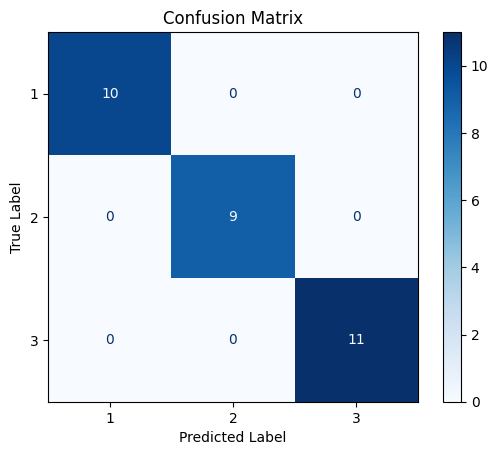

In [ ]:
matrix_dis = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                    display_labels=classifier.classes_)
matrix_dis.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("True Positives:",tp)
print("False Negatives:", fn)
print("False Positives:", fp)
print("True Negatives:", tn)

True Positives: 10
False Negatives: 0
False Positives: 0
True Negatives: 20


In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Recall or True positive rate :',tp/(tp+fn))
print('True negative rate :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))

Accuracy: 1.0
Error Rate:  0.0
Recall or True positive rate : 1.0
True negative rate : 1.0
Precision (Positive predictive value) : 1.0
False Positive Rate : 0.0
